In [ ]:
!pip install -q langchain langchain_groq langchain_community langgraph langchain_experimental langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 13.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires request

In [ ]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

In [ ]:
python_repl = PythonREPL()

In [ ]:
python_repl.run("print(1+1)")

'2\n'

In [ ]:
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)

In [ ]:
python_repl.run("print(3**3)")

'27\n'

In [ ]:
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools import PythonREPLTool
from langchain_experimental.utilities import PythonREPL
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI

# OpenAI API anahtarını al
openai_api_key = userdata.get('openai_api_key')

# OpenAI modelini tanımla
llm = ChatOpenAI(openai_api_key=openai_api_key, model_name="gpt-4-turbo", temperature=0)

# Python kodları çalıştırmak için ajan oluştur
agent_exec = create_python_agent(
    llm=llm,
    tool=PythonREPLTool(),
    verbose=True
)


In [ ]:
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools import PythonREPLTool
from langchain_experimental.utilities import PythonREPL
#from langchain.llms.openai import OpenAI
repl_tool = PythonREPLTool()
import os
from google.colab import userdata
from langchain_groq import ChatGroq
#openai.api_key = userdata.get('openai_api_key')
groq_api_key = userdata.get('GROQ_API_KEY')
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile", temperature=0)
agent_exec = create_python_agent(
    llm=llm,
    tool=PythonREPLTool(),
    verbose=True
)


In [ ]:
print(agent_exec.run(
    """
    Understand,
    Write a single neural network in Python.
    Take synthetic data for y = 2x.
    Train a model for 100 epochs and print every 10 epochs.
    Return prediction for x = 7.
    """
))

/tmp/ipython-input-330953829.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(agent_exec.run(




> Entering new AgentExecutor chain...
To solve this problem, we need to create a simple neural network in Python, generate synthetic data based on the equation y = 2x, train the model, and then use it to predict the value of y when x = 7.

Action: Python_REPL
Action Input:
```python
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic data
x = np.linspace(-10, 10, 100)
y = 2 * x

# Reshape the data for the model
x = x.reshape(-1, 1)

# Create the model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
for epoch in range(100):
    model.fit(x, y, epochs=1, verbose=0)
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {model.evaluate(x, y)}')

# Make a prediction
prediction = model.predict(np.array([[7]]))
print(f'Prediction for x = 7: {prediction[0][0]}')
```


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 158.9953  
Epoch 1, Loss: 152.4479217529297
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 153.2859 
Epoch 11, Loss: 146.95225524902344
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 147.7935 
Epoch 21, Loss: 141.64927673339844
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 142.3522 
Epoch 31, Loss: 136.44540405273438
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 137.1285 
Epoch 41, Loss: 131.4409942626953
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 132.0028 
Epoch 51, Loss: 126.5229721069336
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 126.8304 
Epoch 61, Loss: 121.58109283447266
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 121.8953
Epoch 71, Loss: 116.81546783447266
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 117.0986 
Epoch 81, Loss: 112.22248840332031
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 112.5397 
Epoch 91, Loss: 107.88687133789062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction for x = 7: 1.763800024986267

Thought:Thought: I now 



> Entering new AgentExecutor chain...
To generate synthetic data for daily rainfall and temperature, and then create a bar chart displaying this data, we can use Python with libraries such as numpy for generating synthetic data, matplotlib for creating the bar chart, and pandas for data manipulation.

Action: Python_REPL
Action Input:
```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic data for 30 days
np.random.seed(0)  # For reproducibility
days = 30
rainfall = np.random.uniform(0, 100, days)  # Random rainfall between 0 and 100 mm
temperature = np.random.uniform(-10, 30, days)  # Random temperature between -10 and 30 °C

# Create a DataFrame
df = pd.DataFrame({
    'Day': range(1, days+1),
    'Rainfall (mm)': rainfall,
    'Temperature (°C)': temperature
})

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(df['Day'], df['Rainfall (mm)'])
plt.title('Daily Rainfall')
plt.xlabel('Day')
plt.ylabel('Rainfa

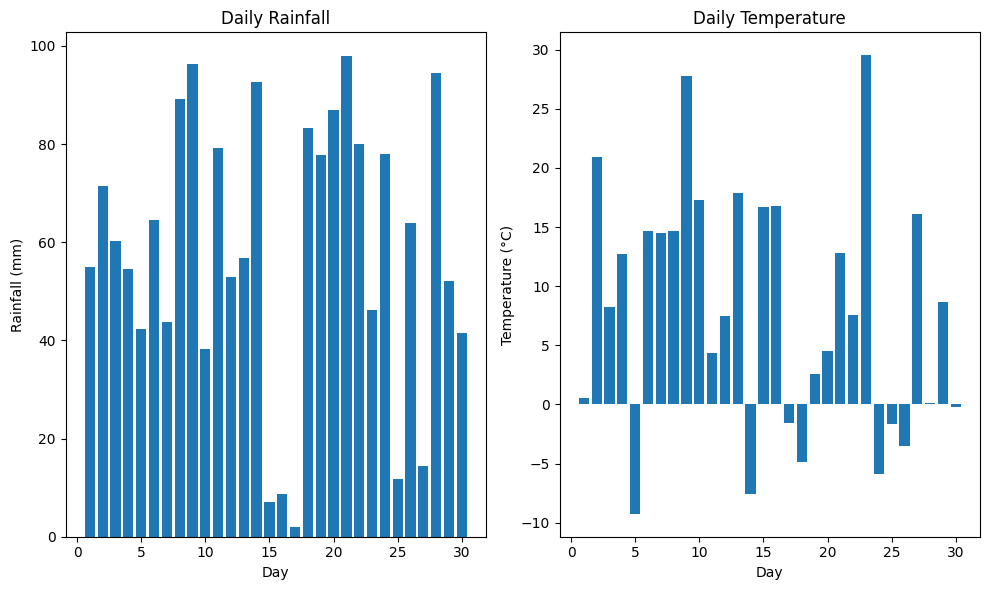


Observation: 
Thought:Thought: The code provided generates synthetic data for daily rainfall and temperature for 30 days and creates a bar chart displaying this data. The chart has two subplots, one for rainfall and one for temperature, each showing the daily values over the 30-day period.

Action: Python_REPL
Action Input:
```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic data for 30 days
np.random.seed(0)  # For reproducibility
days = 30
rainfall = np.random.uniform(0, 100, days)  # Random rainfall between 0 and 100 mm
temperature = np.random.uniform(-10, 30, days)  # Random temperature between -10 and 30 °C

# Create a DataFrame
df = pd.DataFrame({
    'Day': range(1, days+1),
    'Rainfall (mm)': rainfall,
    'Temperature (°C)': temperature
})

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(df['Day'], df['Rainfall (mm)'])
plt.title('Daily Rainfall')
plt.xlabel('Day')
plt.ylabel('Rainfall (mm)')

p

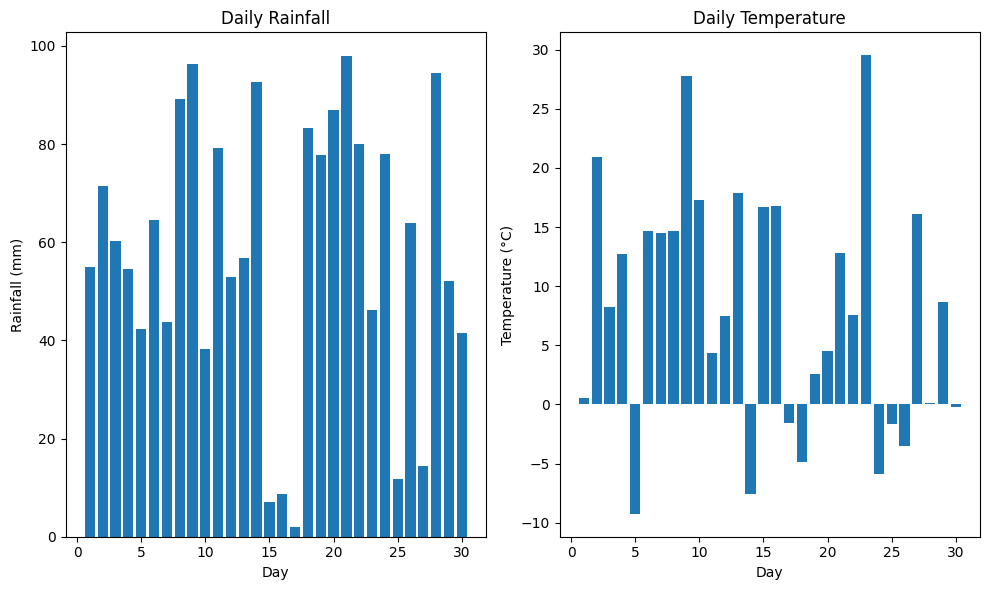


Observation: 
Thought:Thought: I now know the final answer
The provided code generates synthetic data for daily rainfall and temperature for 30 days and creates a bar chart displaying this data. However, the question asks to return the generated chart, which in this context, means providing the code that generates the chart as the final answer is not feasible since the chart is a visual output. 

However, I can provide the code that generates the chart as the solution to the problem.

Final Answer: 
```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic data for 30 days
np.random.seed(0)  # For reproducibility
days = 30
rainfall = np.random.uniform(0, 100, days)  # Random rainfall between 0 and 100 mm
temperature = np.random.uniform(-10, 30, days)  # Random temperature between -10 and 30 °C

# Create a DataFrame
df = pd.DataFrame({
    'Day': range(1, days+1),
    'Rainfall (mm)': rainfall,
    'Temperature (°C)': temperature
})

# Creat

"```python\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\n# Generate synthetic data for 30 days\nnp.random.seed(0)  # For reproducibility\ndays = 30\nrainfall = np.random.uniform(0, 100, days)  # Random rainfall between 0 and 100 mm\ntemperature = np.random.uniform(-10, 30, days)  # Random temperature between -10 and 30 °C\n\n# Create a DataFrame\ndf = pd.DataFrame({\n    'Day': range(1, days+1),\n    'Rainfall (mm)': rainfall,\n    'Temperature (°C)': temperature\n})\n\n# Create a bar chart\nplt.figure(figsize=(10, 6))\nplt.subplot(1, 2, 1)\nplt.bar(df['Day'], df['Rainfall (mm)'])\nplt.title('Daily Rainfall')\nplt.xlabel('Day')\nplt.ylabel('Rainfall (mm)')\n\nplt.subplot(1, 2, 2)\nplt.bar(df['Day'], df['Temperature (°C)'])\nplt.title('Daily Temperature')\nplt.xlabel('Day')\nplt.ylabel('Temperature (°C)')\n\nplt.tight_layout()\nplt.show()\n```"

In [ ]:
agent_exec.run(
    """
    Understand,
    Generate synthetic data for daily rainfall (in mm) and temperature (in °C).
    Create a bar chart displaying the rainfall and temperature data.
    Return the generated chart.
    """
)


In [ ]:
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools import PythonREPLTool
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from google.colab import userdata
from typing import Dict, Any, List, TypedDict
import pandas as pd
from pydantic import BaseModel, Field, PydanticUserError


try:
    class MessagesState(TypedDict):
        messages: List[str]  # Initialize as empty list
        data: pd.DataFrame = None
        report: str = None #added report
        file_path : str = None
        analysed_data : pd.DataFrame = None

except PydanticUserError as exc_info:
    assert exc_info.code == 'schema-for-unknown-type'

# System Prompt for the agentic workflow
SYSTEM_PROMPT = """
You are a data analysis assistant designed to process, analyze, and validate data workflows.

Your workflow consists of three nodes:
1. **Data Loader Node:** This node reads a CSV file provided as user input and extracts the data for further processing.
2. **Agent Exec Node:** This node receives the loaded data and a user query. It analyzes the data, generates visualizations, and provides insights based on the query.
3. **Report Node:** This node validates a human-provided message using the user query, the analyzed results, and generated visualizations from the Agent Exec Node.

Your responsibilities include:
- Ensuring accurate data loading and seamless transitions between nodes.
- Generating clear, actionable insights and visualizations from the provided data and query.
- Validating and refining the final report to align with the user's intent and analysis results.

Always follow these steps:
1. Load the data from the CSV file accurately.
2. Analyze and visualize the data according to the user's query.
3. Validate the user-provided message using the results and visualizations, ensuring consistency and accuracy.

Provide outputs in a structured and concise format. Ensure transparency and clarity in all stages of the workflow.
"""

# Initialize API key and LLM
groq_api_key = userdata.get('GROQ_API_KEY')
if not groq_api_key:
    raise ValueError("GROQ_API_KEY not found in Colab userdata.")

llm = ChatGroq(
    groq_api_key=groq_api_key,
    model_name="llama-3.3-70b-versatile",
    temperature=0

)

# Create Python agent
agent_exec_tool = PythonREPLTool()
agent_exec = create_python_agent(llm=llm, tool=agent_exec_tool, verbose=True, system_prompt=SYSTEM_PROMPT)

# Define functional steps
def load_data(MessagesState) -> Dict[str, pd.DataFrame]:
    """Loads data from a CSV file."""
    messages = MessagesState.get("messages")
    file_path = MessagesState.get("file_path")

    if not file_path:
        raise ValueError("No file path provided.")
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {file_path}")
    MessagesState["data"] = data #Use state not messages
    return MessagesState

def analyze_data(MessagesState) -> Dict[str, str]:
    """Analyzes and visualizes the data based on the user's query."""
    messages = MessagesState.get("messages")
    data = MessagesState.get("data")
    if not messages or data is None:
        raise ValueError("Query or data missing.")

    task = f"""
    Understand,
    {messages}
    Analyze the following data: {data.head().to_dict()}
    Generate relevant visualizations and provide insights.
    """
    results = agent_exec.run(task)
    MessagesState["analysed_data"] = results
    return MessagesState

def generate_report(MessagesState) -> Dict[str, str]:
    """Validates the user-provided message using results and visualizations."""
    messages = MessagesState.get("messages")
    analysed_data = MessagesState.get("analysed_data")

    validation_task = f"""
    Validate the following user input:
    "{messages}"
    Based on these analysis results:
    "{analysed_data}"
    """
    report = agent_exec.run(validation_task)
    MessagesState["analysed_data"] = report
    return MessagesState

# Define the workflow using StateGraph
graph = StateGraph(MessagesState)


# Add functional nodes to the graph
graph.add_node(load_data, START)
graph.add_node(analyze_data)
graph.add_node(generate_report)

graph.add_edge(START, "load_data")
graph.add_edge("load_data", "analyze_data")
graph.add_edge("analyze_data", "generate_report")
graph.add_edge("generate_report", END)

my_graph = graph.compile()


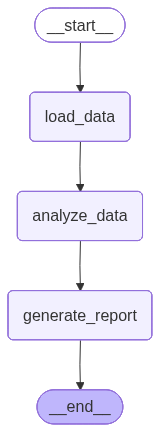

In [ ]:
from IPython.display import Image, display
display(Image(my_graph.get_graph(xray=True).draw_mermaid_png()))

{'load_data': {'data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  household

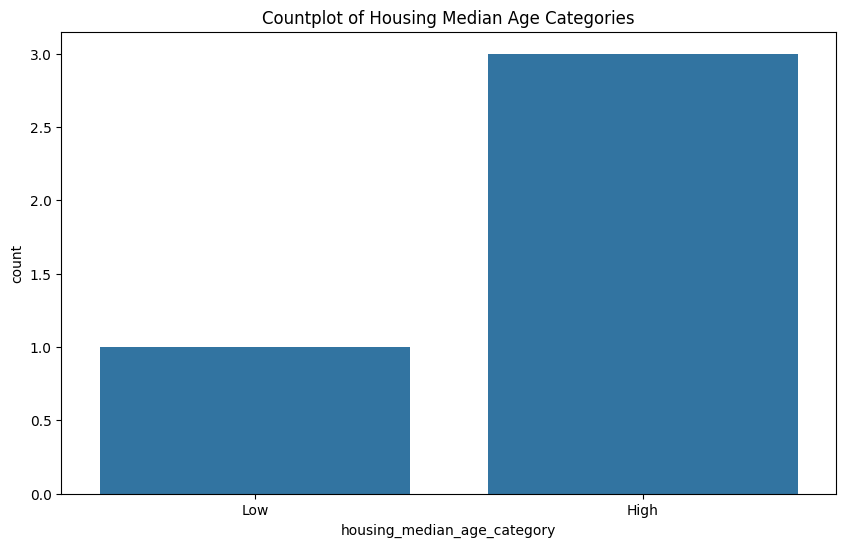


Observation: 
Thought:

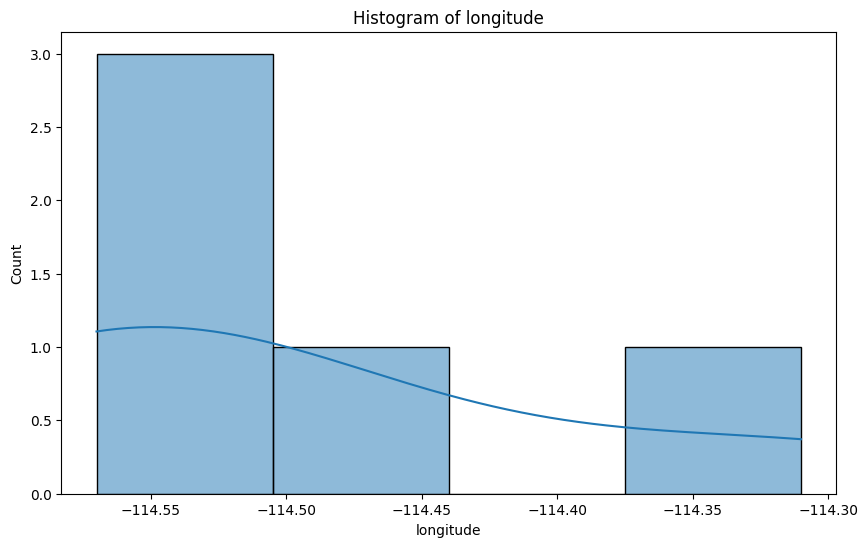

Observation: The code provided will generate a countplot for the 'housing_median_age_category' which is a categorical representation of the 'housing_median_age' variable. This plot will show the distribution of the different categories of 'housing_median_age'.

Thought: To further analyze the data and provide more insights, we could generate additional visualizations such as histograms for the numerical variables, scatter plots to examine relationships between variables, and box plots to compare distributions.

Action: Python_REPL
Action Input:
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given data
data = {
    'longitude': {0: -114.31, 1: -114.47, 2: -114.56, 3: -114.57, 4: -114.57},
    'latitude': {0: 34.19, 1: 34.4, 2: 33.69, 3: 33.64, 4: 33.57},
    'housing_median_age': {0: 15.0, 1: 19.0, 2: 17.0, 3: 14.0, 4: 20.0},
    'total_rooms': {0: 5612.0, 1: 7650.0, 2: 720.0, 3: 1501.0, 4: 1454.0},
    'total_bedrooms': {0: 1283.0, 1: 1901.0, 2: 

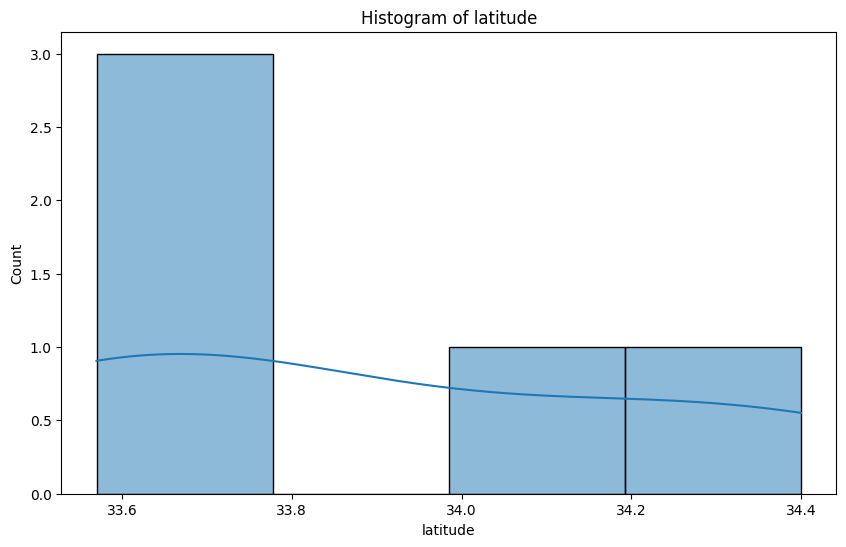

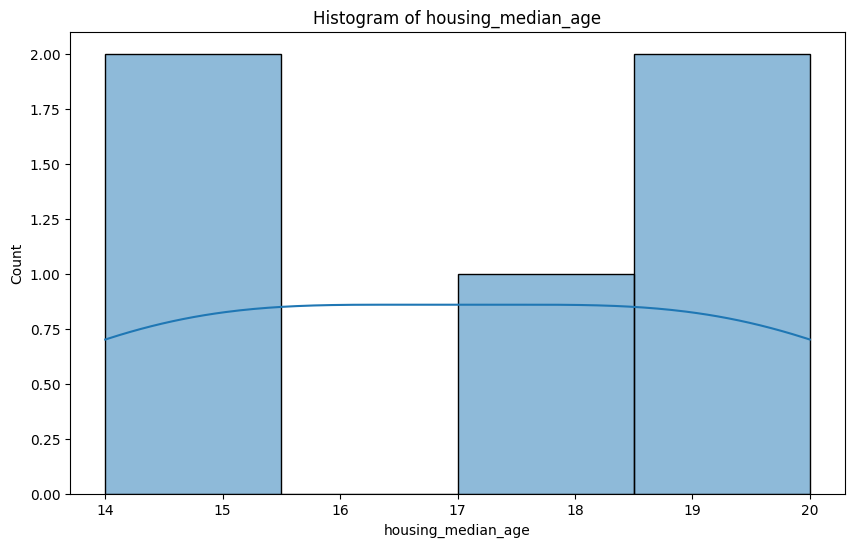

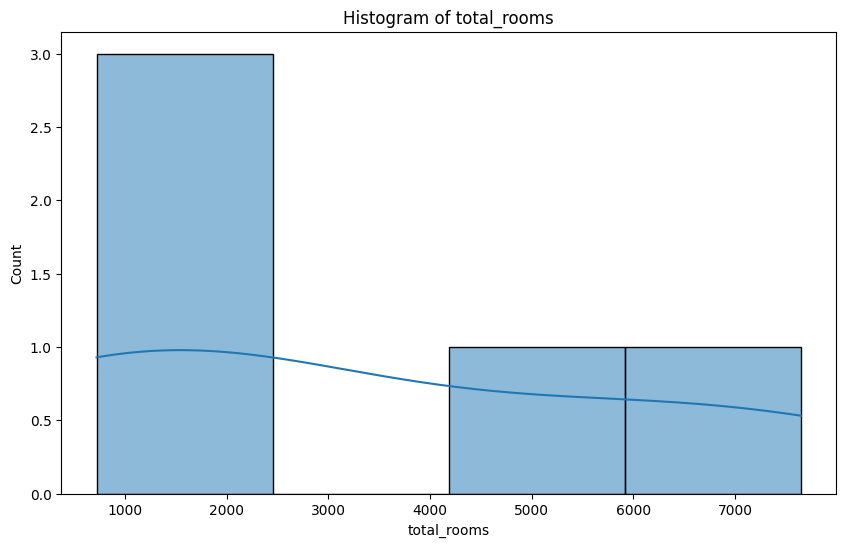

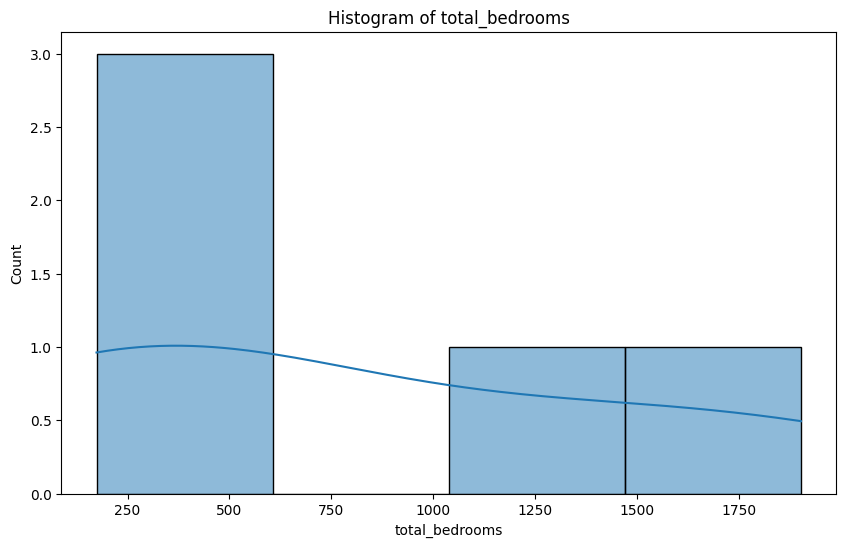

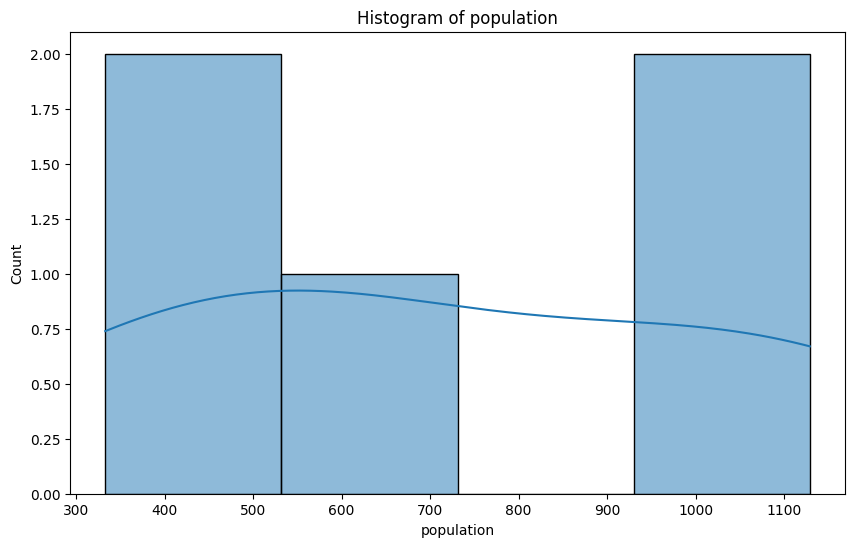

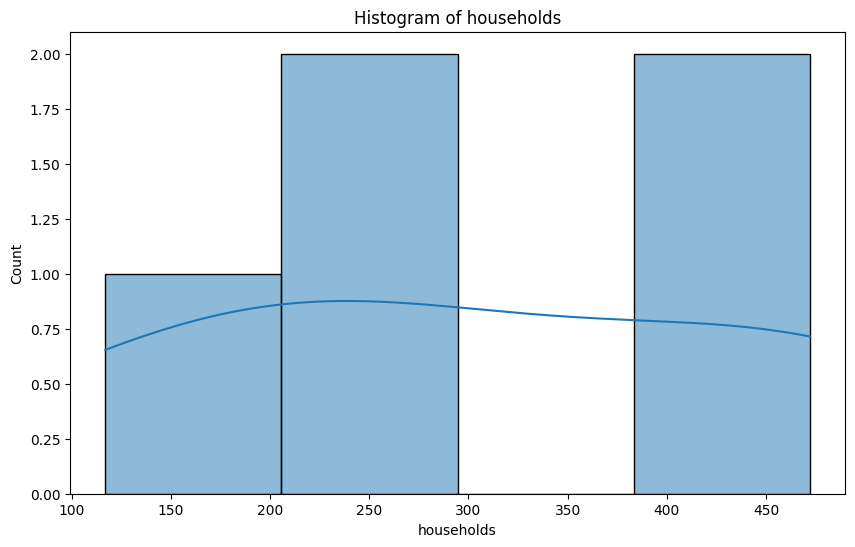

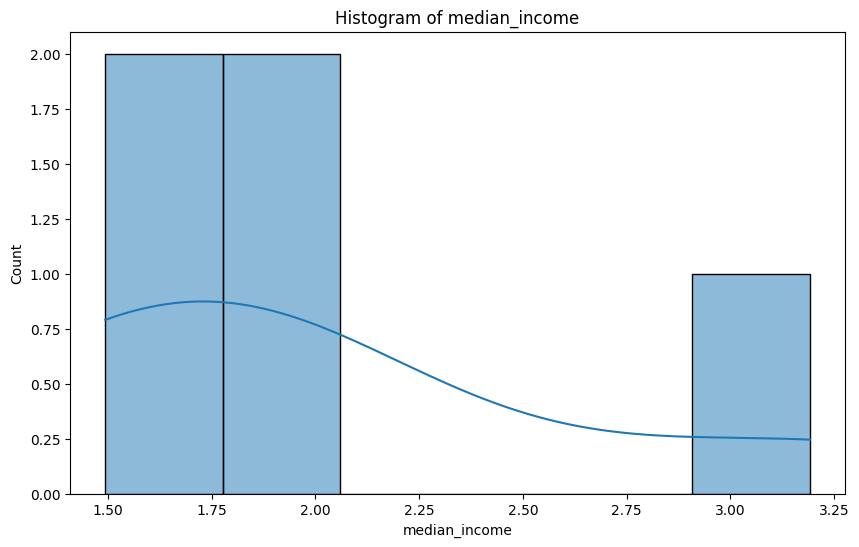

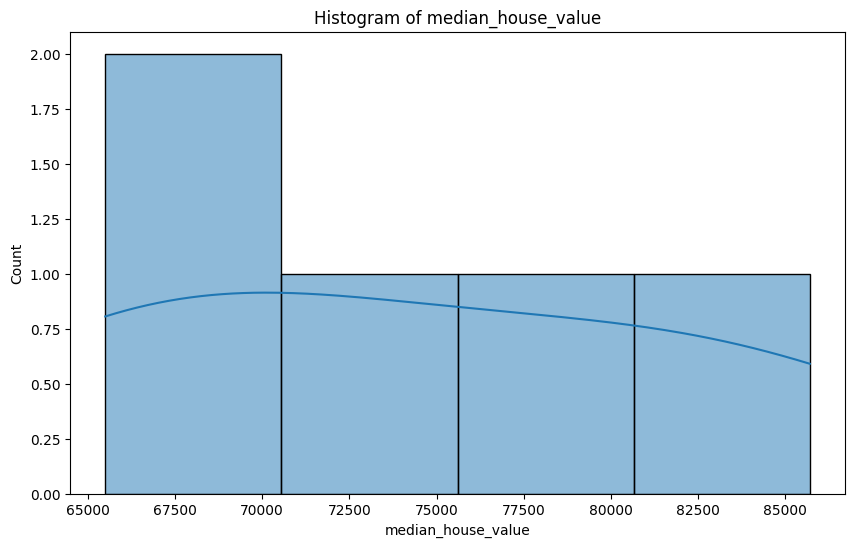

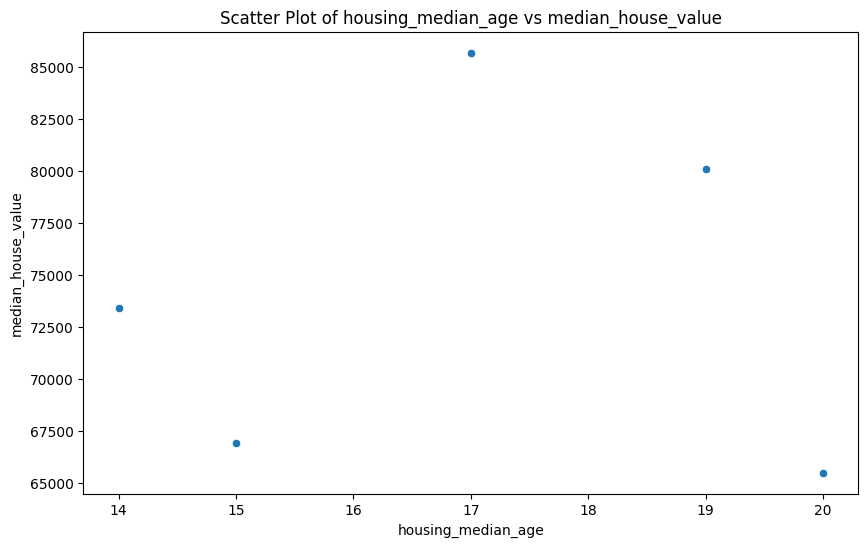

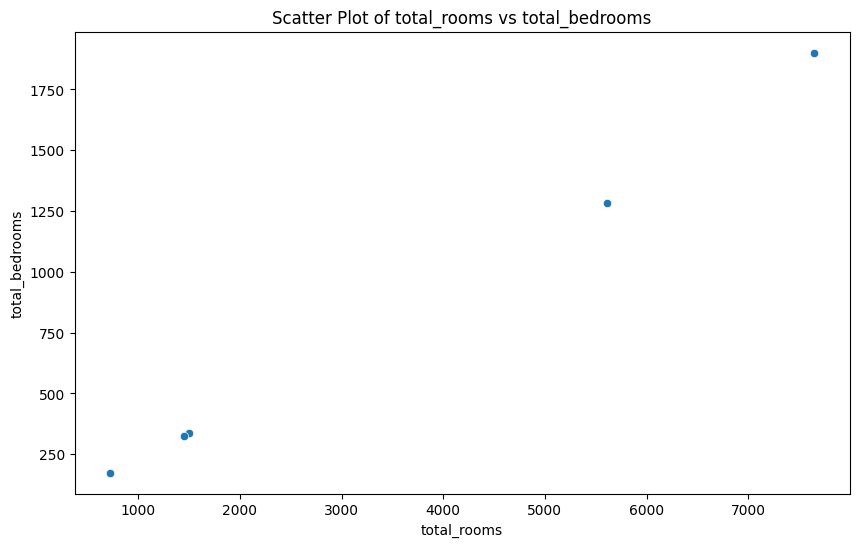

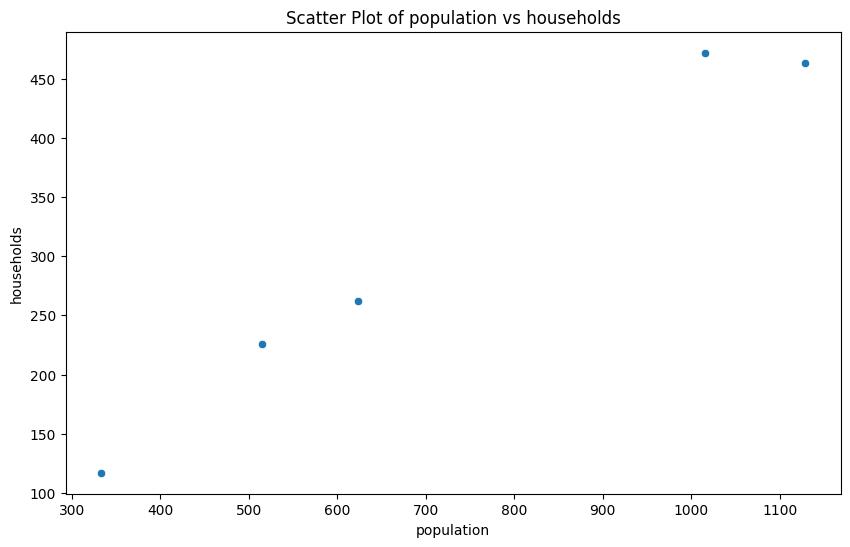

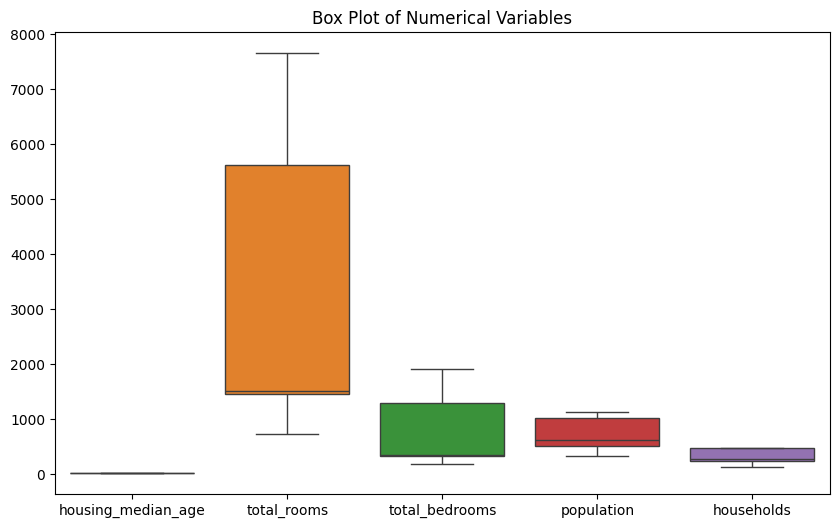


Observation: 
Thought:Thought: The provided code will generate various visualizations to analyze the given data. These include a countplot for the categorized 'housing_median_age', histograms for the numerical variables, scatter plots to examine relationships between variables, and box plots to compare distributions.

However, since the question asks for a countplot for categories and the data provided is mostly numerical, we had to categorize one of the numerical variables ('housing_median_age') to demonstrate the countplot. For a more meaningful analysis, it would be beneficial to have categorical variables or to apply more sophisticated methods to categorize the numerical data based on the context of the problem.

Given the nature of the data and the visualizations generated, we can observe the distribution of the 'housing_median_age' categories, the histograms of the numerical variables, the relationships between certain pairs of variables through scatter plots, and the comparison

In [ ]:

from pprint import pprint

# Example inputs for the workflow
inputs = {
    "file_path": "/content/sample_data/california_housing_train.csv",  # Replace with your CSV file path
    "messages": "Generate a countplot for categories."
}


for output in my_graph.stream(inputs):
    pprint(output)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


{'load_data': {'data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  household

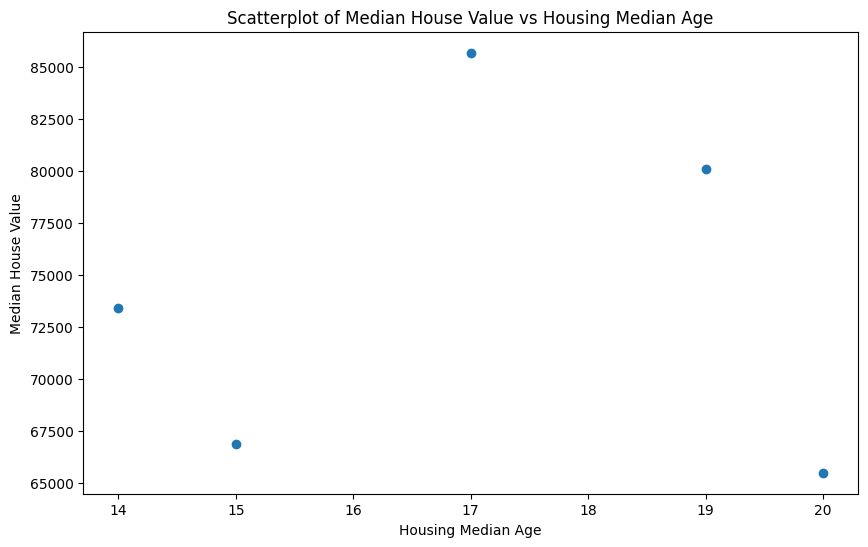

To generate a scatterplot comparing median_house_value and housing_median_age, we can use the matplotlib library in Python. We will first import the necessary libraries, then create a scatterplot with median_house_value on the y-axis and housing_median_age on the x-axis.

Action: Python_REPL
Action Input:
```python
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = {'longitude': {0: -114.31, 1: -114.47, 2: -114.56, 3: -114.57, 4: -114.57}, 
        'latitude': {0: 34.19, 1: 34.4, 2: 33.69, 3: 33.64, 4: 33.57}, 
        'housing_median_age': {0: 15.0, 1: 19.0, 2: 17.0, 3: 14.0, 4: 20.0}, 
        'total_rooms': {0: 5612.0, 1: 7650.0, 2: 720.0, 3: 1501.0, 4: 1454.0}, 
        'total_bedrooms': {0: 1283.0, 1: 1901.0, 2: 174.0, 3: 337.0, 4: 326.0}, 
        'population': {0: 1015.0, 1: 1129.0, 2: 333.0, 3: 515.0, 4: 624.0}, 
        'households': {0: 472.0, 1: 463.0, 2: 117.0, 3: 226.0, 4: 262.0}, 
        'median_income': {0: 1.4936, 1: 1.82, 2: 1.6509, 3: 3.1917, 4:

In [ ]:

from pprint import pprint

# Example inputs for the workflow
inputs = {
    "file_path": "/content/sample_data/california_housing_train.csv",  # Replace with the actual CSV file path
    "messages": [
        ("system", "Generate a scatterplot comparing median_house_value and housing_median_age."),
        ("user", "Please validate this graph and analysis.")],
}

# Initialize messages state (should be an empty list)
messages = MessagesState()

for output in my_graph.stream(inputs):
    pprint(output)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


{'load_data': {'data':      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                            

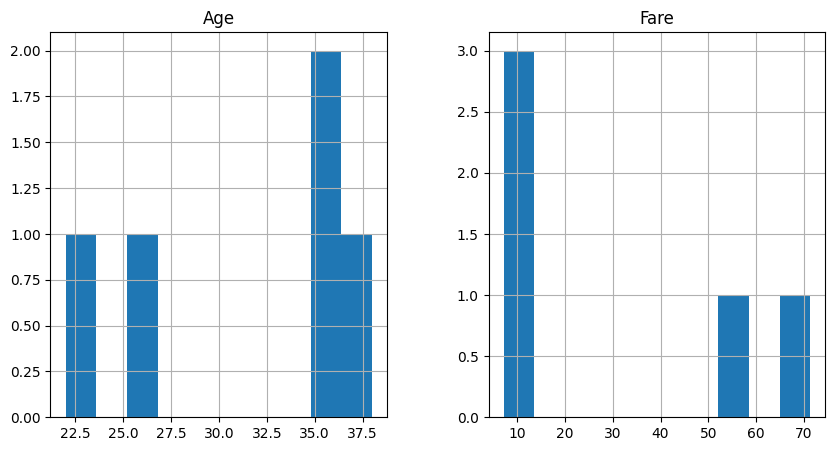

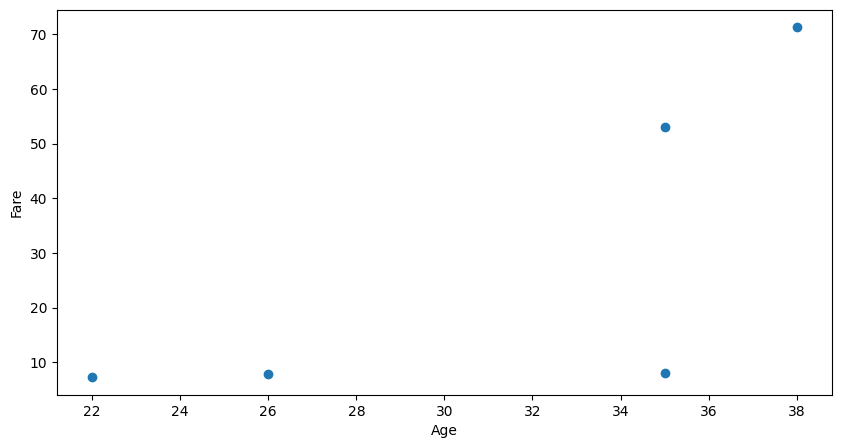

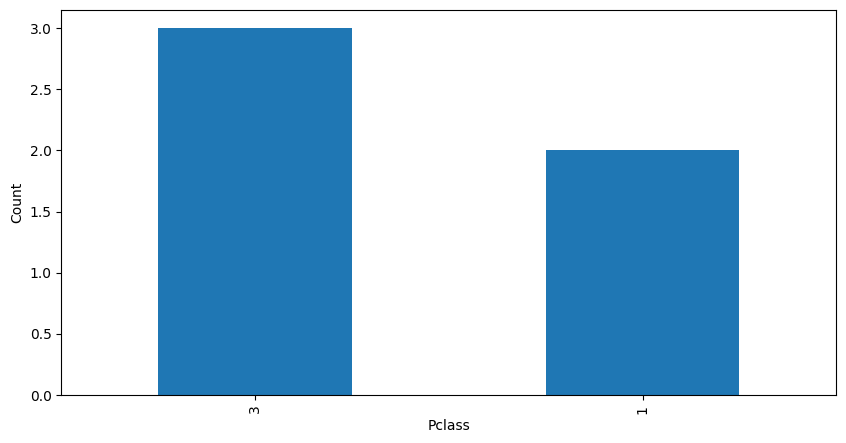

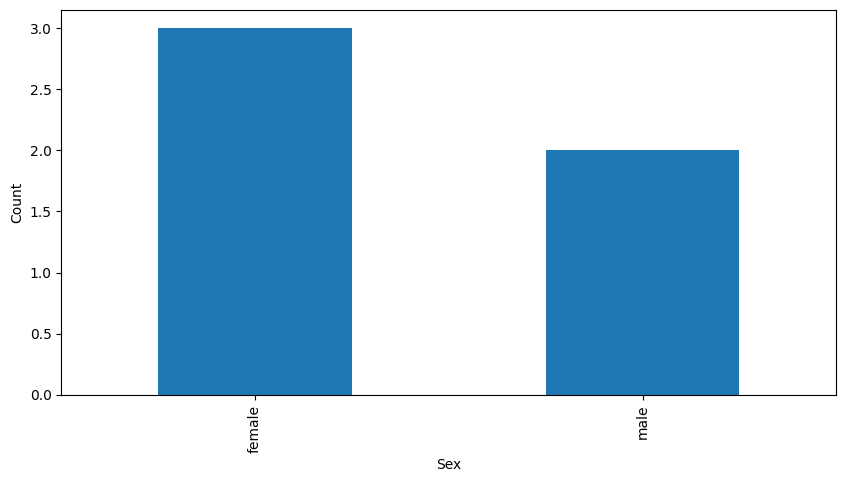

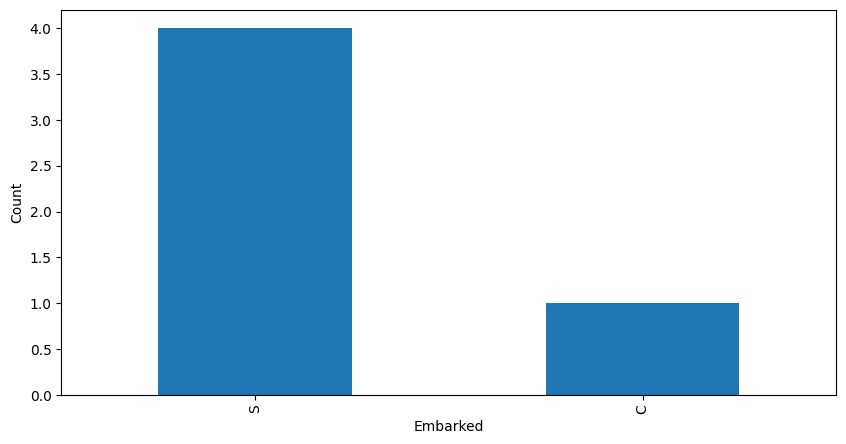


Observation: 
Thought:The provided code and observations suggest that the data is related to the Titanic passenger dataset. The correlation matrix shows that there are significant correlations between the variables 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare'. The histograms and scatter plots provide visualizations of the distribution of the data and the relationships between the variables.

However, the code does not provide a specific answer to the question. To provide a final answer, we need to analyze the observations and provide insights based on the data.

Final Answer: The data suggests that there are significant correlations between the variables 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare'. The histograms and scatter plots provide visualizations of the distribution of the data and the relationships between the variables. However, without a specific question, it is difficult to provide a more detailed answer.

> Finished chain.
{'analyze_data': {'anal

In [ ]:
#Titanic dataset
inputs = {
    "file_path": "/content/drive/MyDrive/train.csv",  # Replace with the actual CSV file path
    "messages": "analyse correlations and use all rows of the given data."
}


for output in my_graph.stream(inputs):
    pprint(output)